In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os

from src.Question_A_funcs import simulation_dla

save_folder = 'fig'
os.makedirs(save_folder, exist_ok=True)

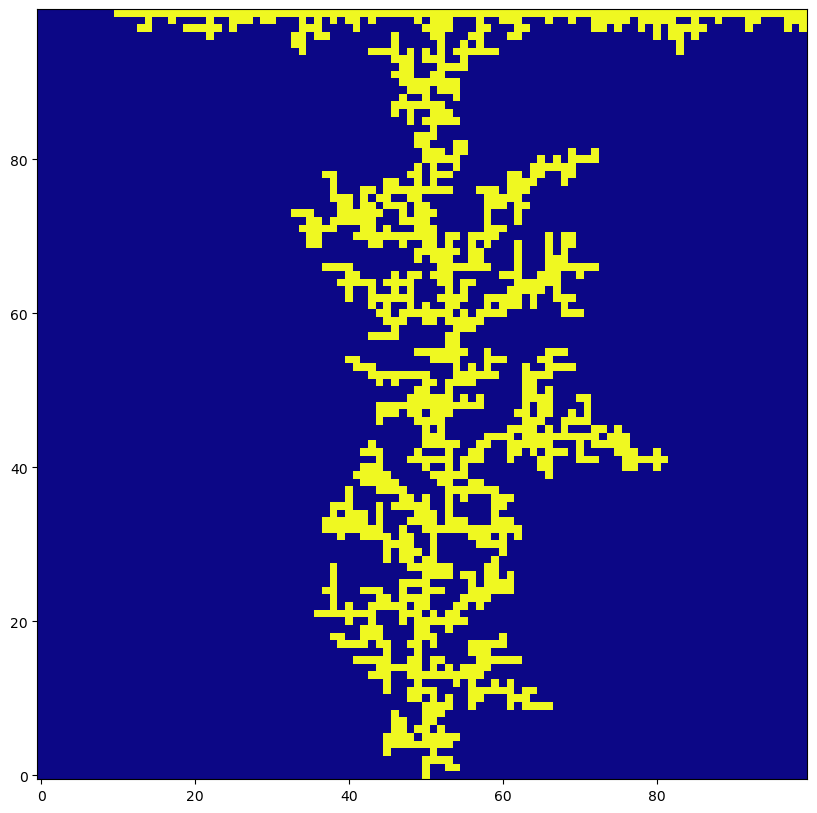

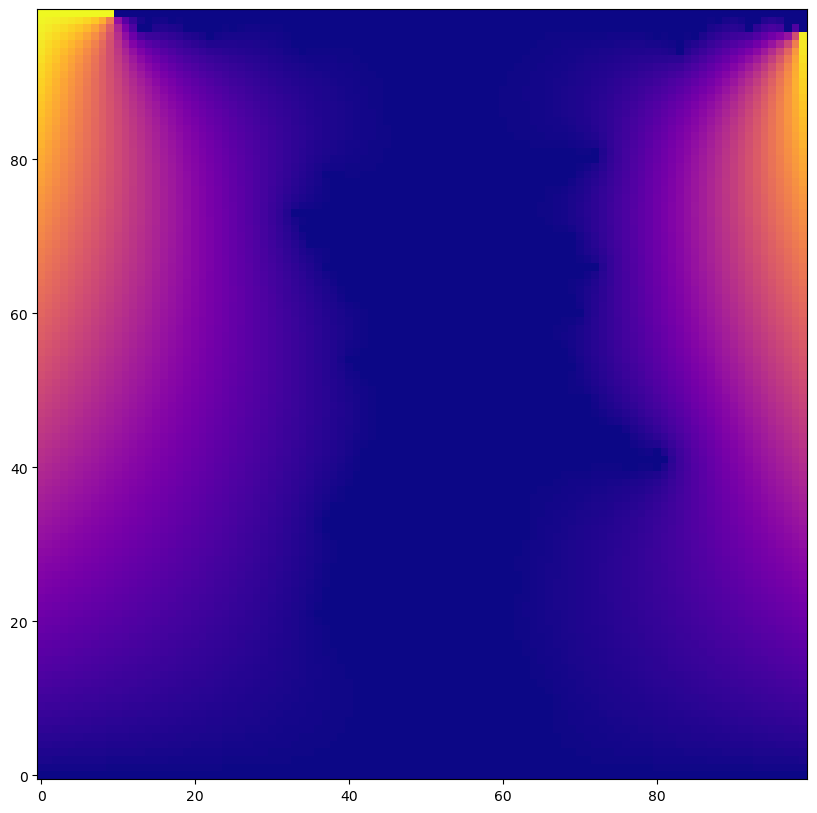

In [4]:
np.random.seed(0)
c, cluster, history = simulation_dla(grid_size=(100, 100), steps=1200, eta=1, w=1.8)

plt.figure(figsize=(10, 10))   
plt.imshow(cluster, origin='lower', cmap='plasma')
plt.show()

plt.figure(figsize=(10, 10))   
plt.imshow(c, origin='lower', cmap='plasma')
plt.show()

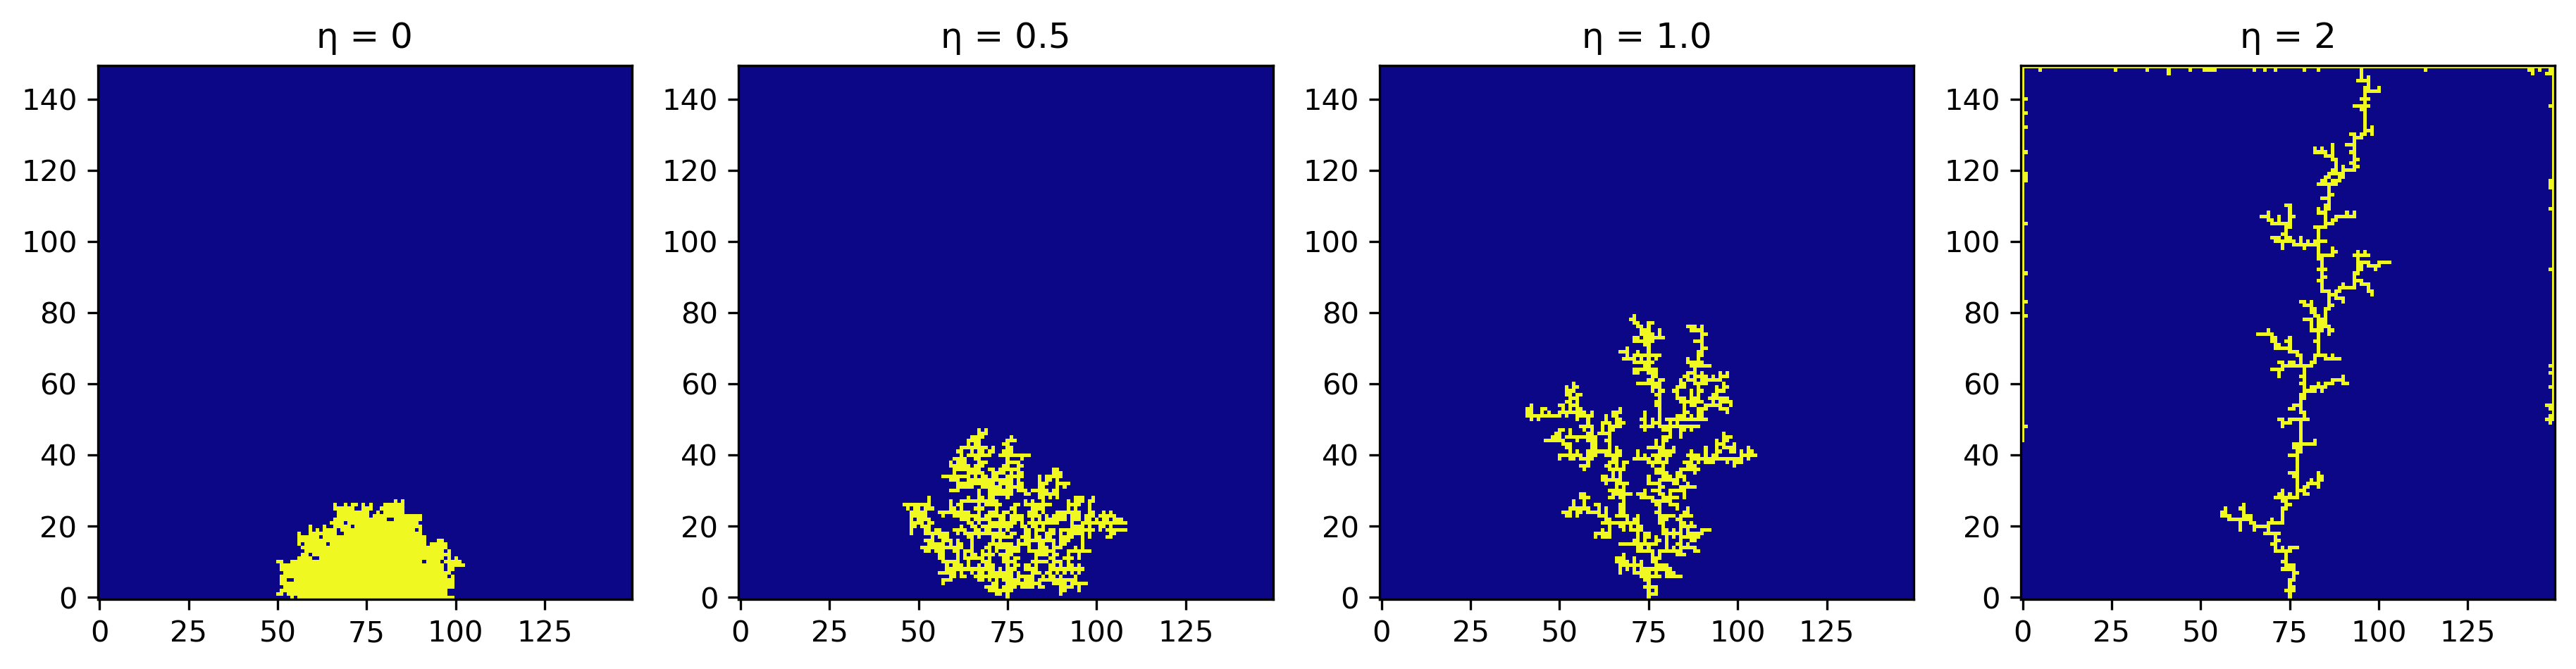

In [3]:
np.random.seed(0)

fig, axes = plt.subplots(1, 4, figsize=(15, 5), dpi=300) # Initialize figure

etas = [0, 0.5, 1.0, 2]

for ind, eta in enumerate(etas):
    c, cluster, history = simulation_dla(grid_size=(150, 150), steps=1000, eta=eta, w=1.8)
    axes[ind].imshow(cluster, origin='lower', cmap='plasma')
    axes[ind].set_title(f'η = {eta}')

save_path = os.path.join(save_folder, f'Question A.png')
plt.savefig(save_path, dpi=300)
plt.show()